-----
# **CLUSTERING ANALYSIS**
-------

## **OBJECTIVE :**

#### Introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset

In [4]:
import warnings
warnings.filterwarnings('ignore')

## DATA PREPROCESSING :

#### IMPORT LIBRARIES :

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [43]:
from sklearn.preprocessing import StandardScaler 

In [8]:
from sklearn.cluster import KMeans

In [9]:
from scipy.cluster.hierarchy import dendrogram , linkage

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

#### IMPORT FILES AND EXPLORING :

In [12]:
df = pd.read_excel('EastWestAirlines.xlsx'  ,sheet_name = 'data' )

In [13]:
df.shape

(3999, 12)

In [14]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [15]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [16]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


#### REMOVE OUTLIERS

In [18]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

columns_to_check = ['Balance', 'Bonus_miles', 'Bonus_trans', 'Days_since_enroll', 'Flight_miles_12mo']

df1 = remove_outliers_iqr(df, columns_to_check)
df1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [19]:
df1.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000
mean,2118.689076,44894.049324,83.151626,1.761052,1.014980,1.001827,9996.023383,8.989770,18.791377,0.127512,3917.217026,0.268542
std,1154.156245,41423.087265,613.947595,1.095867,0.151003,0.063381,12558.468084,7.406871,65.335766,0.437839,2054.234434,0.443282
min,1.000000,50.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1144.000000,14732.000000,0.000000,1.000000,1.000000,1.000000,490.000000,2.000000,0.000000,0.000000,2140.000000,0.000000
50%,2173.000000,31673.000000,0.000000,1.000000,1.000000,1.000000,4175.000000,9.000000,0.000000,0.000000,3799.000000,0.000000
75%,3116.000000,62569.000000,0.000000,3.000000,1.000000,1.000000,15803.000000,14.000000,0.000000,0.000000,5555.000000,1.000000
max,4021.000000,202636.000000,11148.000000,5.000000,3.000000,4.000000,52176.000000,33.000000,359.000000,4.000000,8296.000000,1.000000


#### EXPLORATORY DATA ANALYSIS (EDA) :

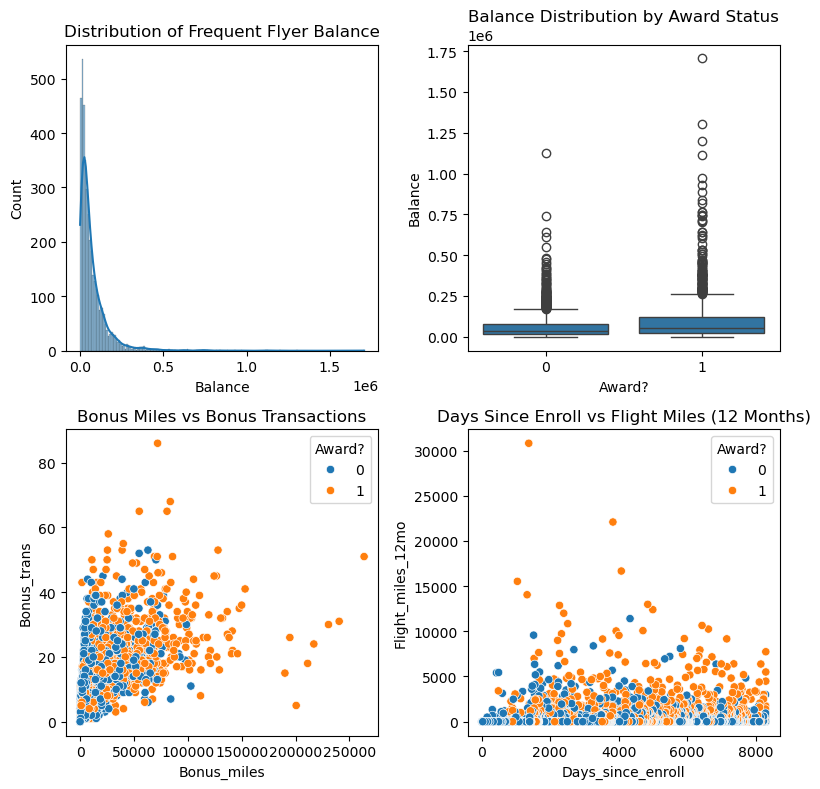

In [21]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.histplot(data=df , x='Balance', kde=True)
plt.title('Distribution of Frequent Flyer Balance')

plt.subplot(2,2,2)
sns.boxplot(x='Award?', y='Balance', data=df)
plt.title('Balance Distribution by Award Status')

plt.subplot(2,2,3)
sns.scatterplot(x='Bonus_miles', y='Bonus_trans', data=df, hue='Award?')
plt.title('Bonus Miles vs Bonus Transactions')

plt.subplot(2,2,4)
sns.scatterplot(x='Days_since_enroll', y='Flight_miles_12mo', data=df, hue='Award?')
plt.title('Days Since Enroll vs Flight Miles (12 Months)')

plt.tight_layout()
plt.show()

- Skewed with most passengers having low balances
- Similar balance distribution for award vs non-award
- Bonus miles have positive correlation with transactions

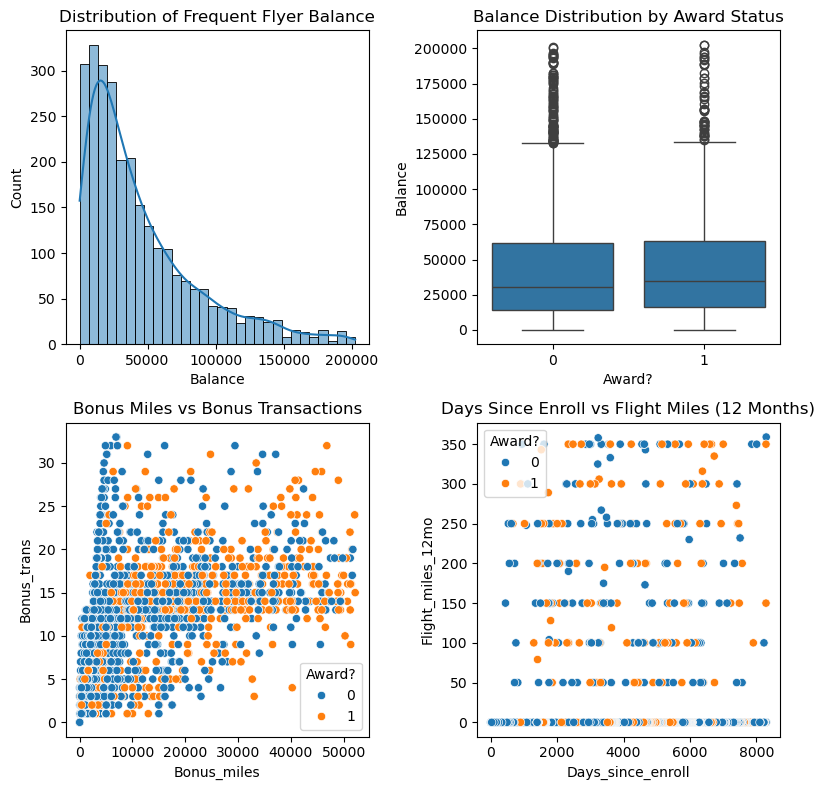

In [23]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.histplot(data=df1 , x='Balance', kde=True)
plt.title('Distribution of Frequent Flyer Balance')

plt.subplot(2,2,2)
sns.boxplot(x='Award?', y='Balance', data=df1)
plt.title('Balance Distribution by Award Status')

plt.subplot(2,2,3)
sns.scatterplot(x='Bonus_miles', y='Bonus_trans', data=df1, hue='Award?')
plt.title('Bonus Miles vs Bonus Transactions')

plt.subplot(2,2,4)
sns.scatterplot(x='Days_since_enroll', y='Flight_miles_12mo', data=df1, hue='Award?')
plt.title('Days Since Enroll vs Flight Miles (12 Months)')

plt.tight_layout()
plt.show()

- Most people have fewer than 50,000 flyer miles
- Award and non-award balances are similar
- No clear link between days enrolled and flight miles

#### CORRILATIONS :

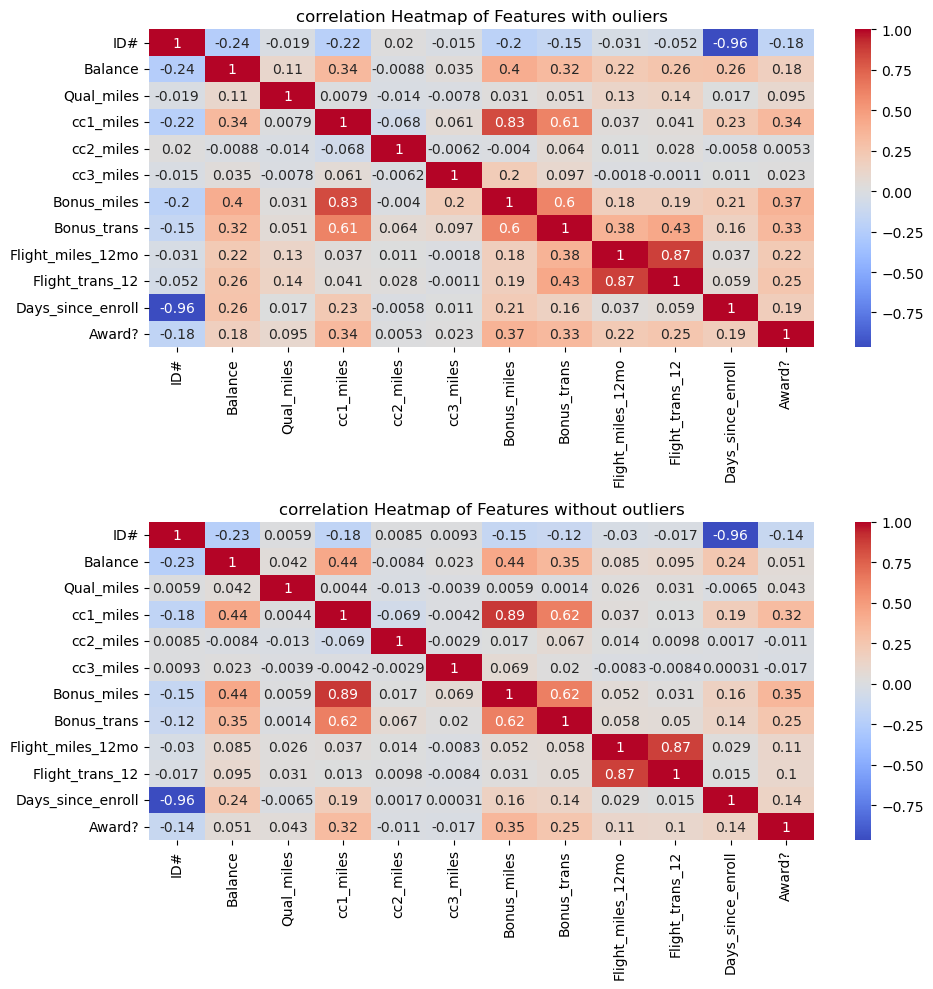

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.heatmap(df.corr() ,annot=True ,cmap='coolwarm')
plt.title('correlation Heatmap of Features with ouliers')

plt.subplot(2,1,2)
sns.heatmap(df1.corr() ,annot=True ,cmap='coolwarm')
plt.title('correlation Heatmap of Features without outliers')

plt.tight_layout()
plt.show()

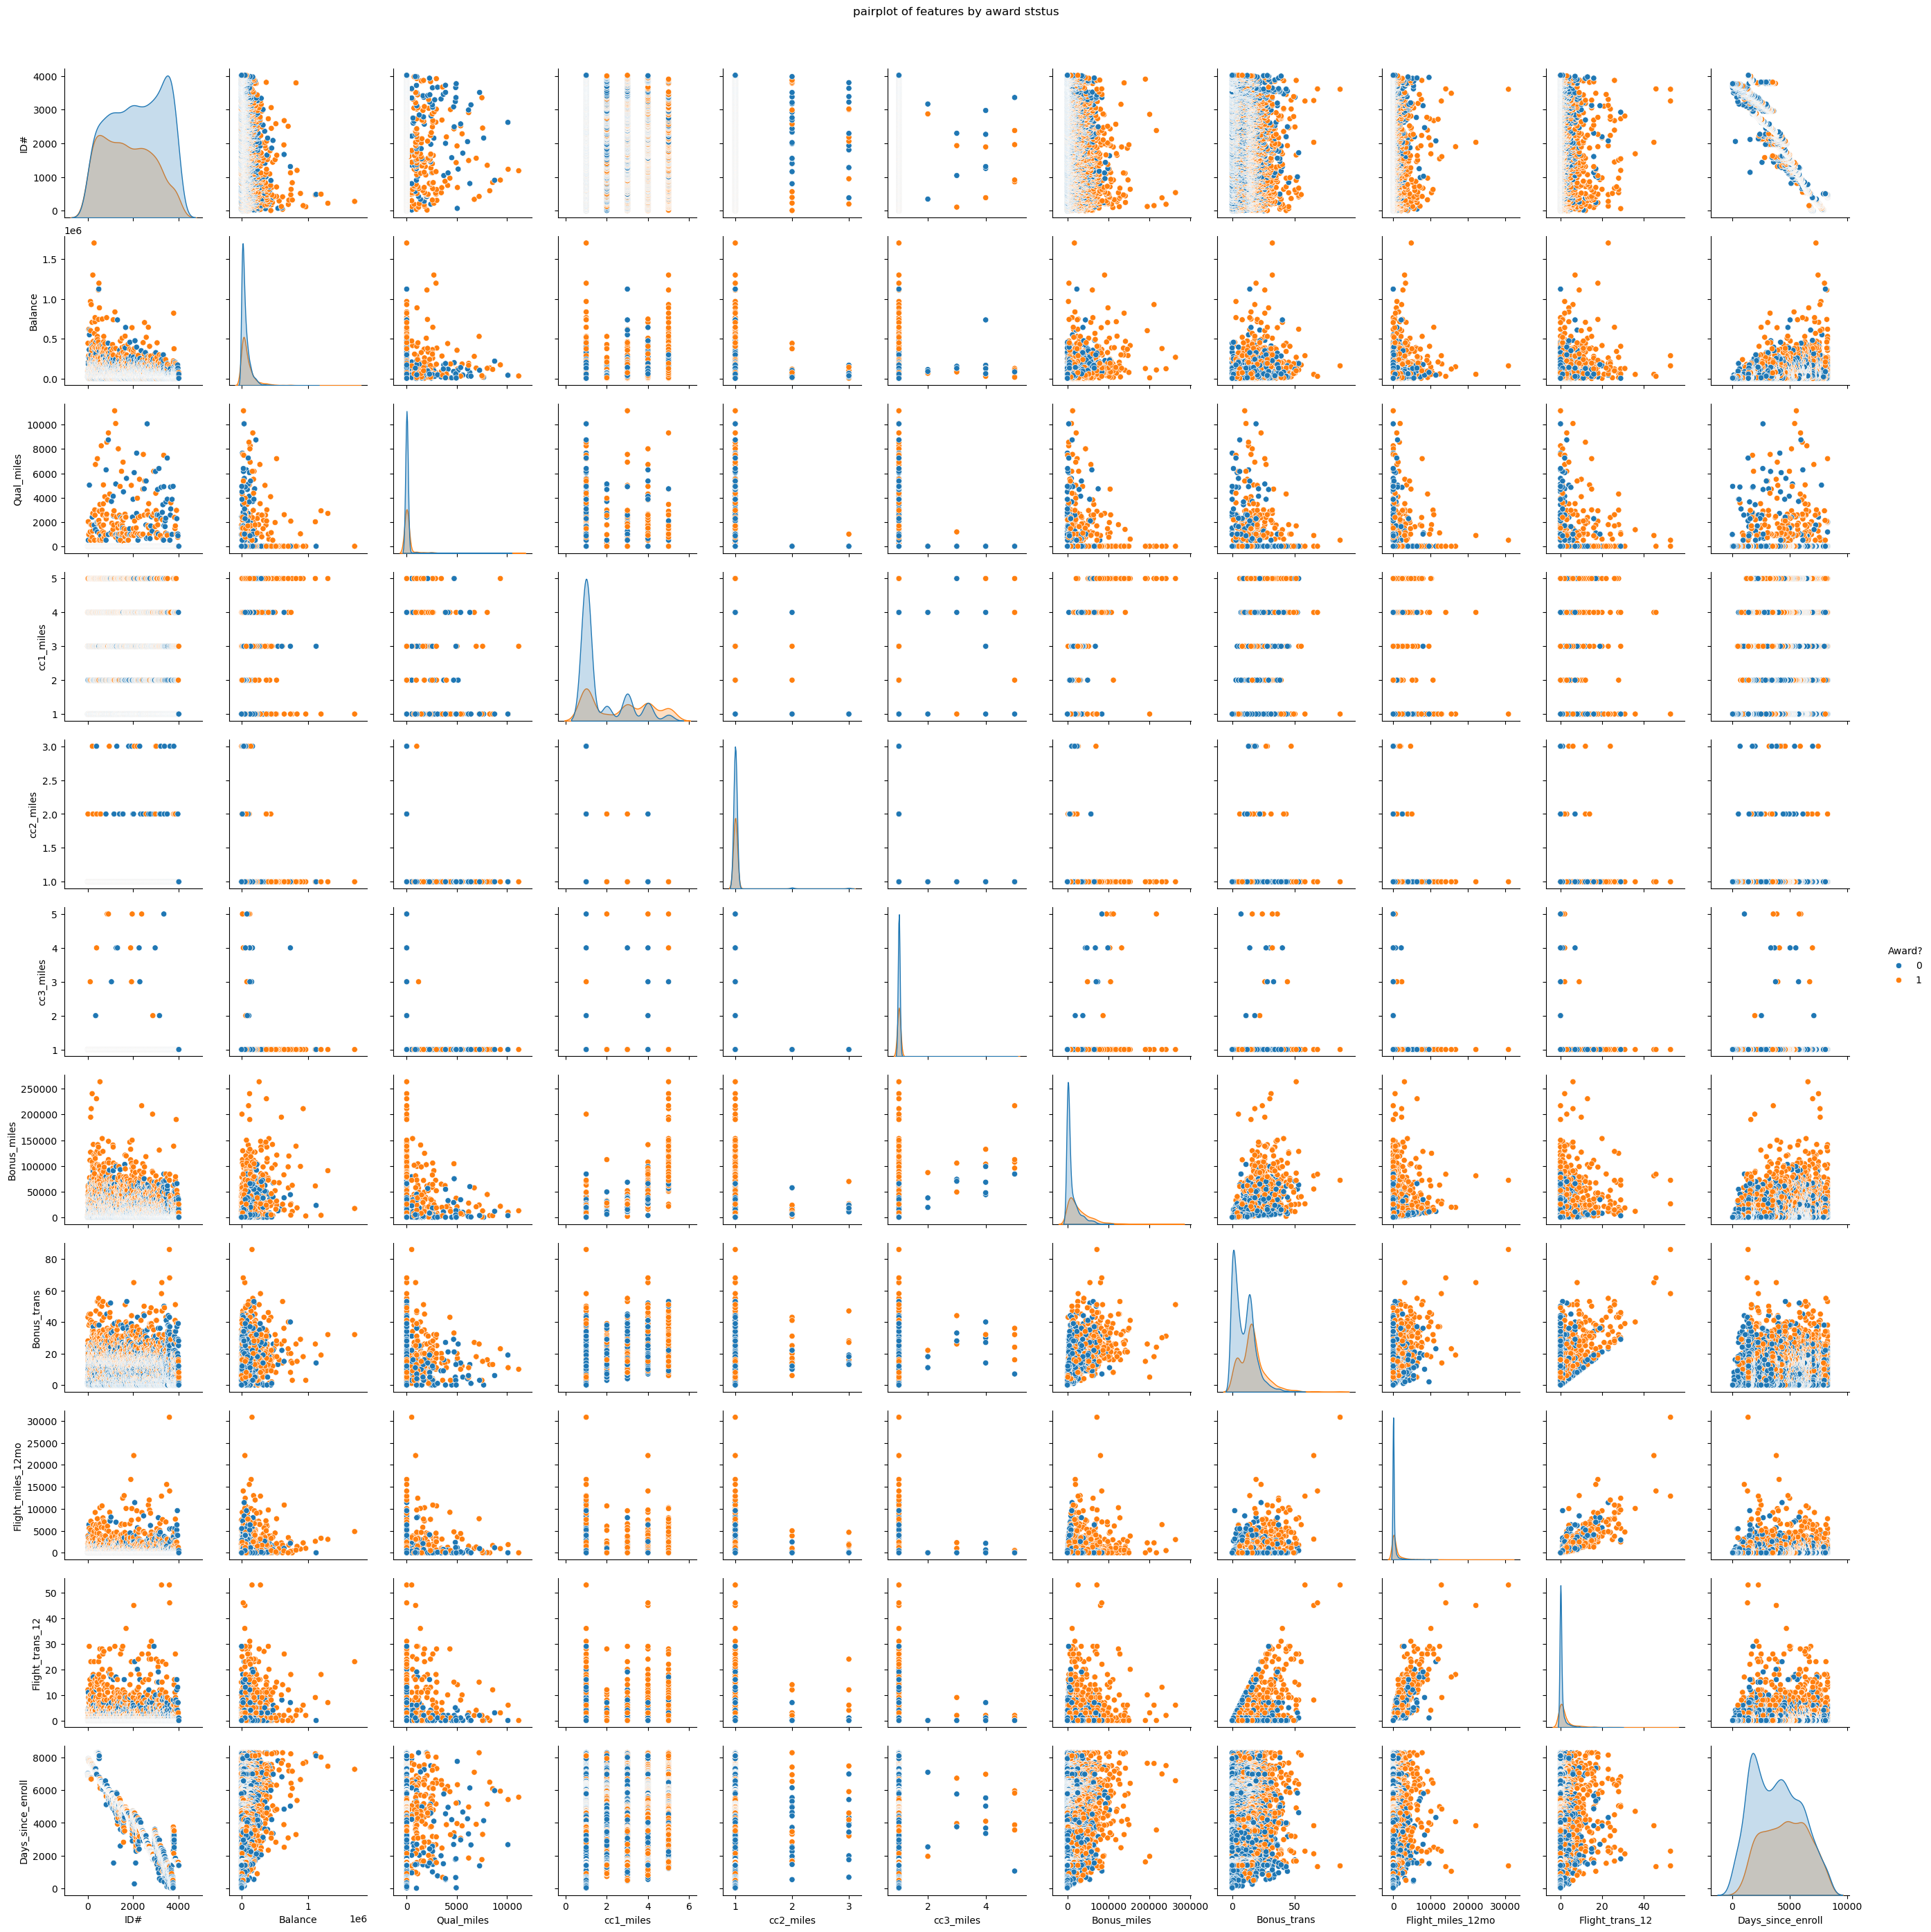

In [26]:
sns.pairplot(df,hue='Award?',diag_kind='kde')
plt.suptitle('pairplot of features by award ststus',y=1.02)
plt.show()

- There is a positive correlation, indicating that higher experience often corresponds to higher salaries
- The orange cluster suggests that individuals with more awards (possibly a higher count) tend to have higher salaries
- Age shows a slight positive trend with salary, though there's significant variability, indicating that salary may also depend on other factors
- There seems to be a positive relationship with more experience tend to win more awards
- The density plots show skewness in some features, such as salary and age, where most data points fall within a specific range (lower salaries, younger ages) 

In [53]:
x=df.drop(['ID#','Award?'],axis=1)
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler 

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

- Silhouette Score :
  -      The Silhouette Score helps you understand how well the data points (like dots in a graph) are grouped together in their clusters (groups)
  -      A score of +1 means the points are grouped perfectly
  -      A score of 0 means the points are on the edge between two groups
  -      A score of -1 means the points are placed in the wrong group

#### K-Means :

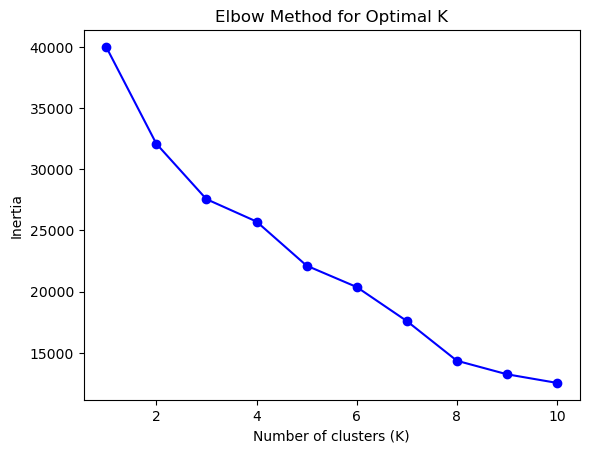

In [55]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaler )
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [79]:
kmeans = KMeans(n_clusters =2 ,random_state=42)
kmeans_labels = kmeans.fit_predict(x_scaler)

kmeans_silhouette = silhouette_score(x_scaler,kmeans_labels)
print(f'k-means silhoutte score : {kmeans_silhouette}')

k-means silhoutte score : 0.35826638416515033


- The points are somewhat well-grouped but not perfectly. Some points are clearly in their correct groups, but there are others that are near the boundary between two groups, making it harder to separate them

#### HIERARICAL :

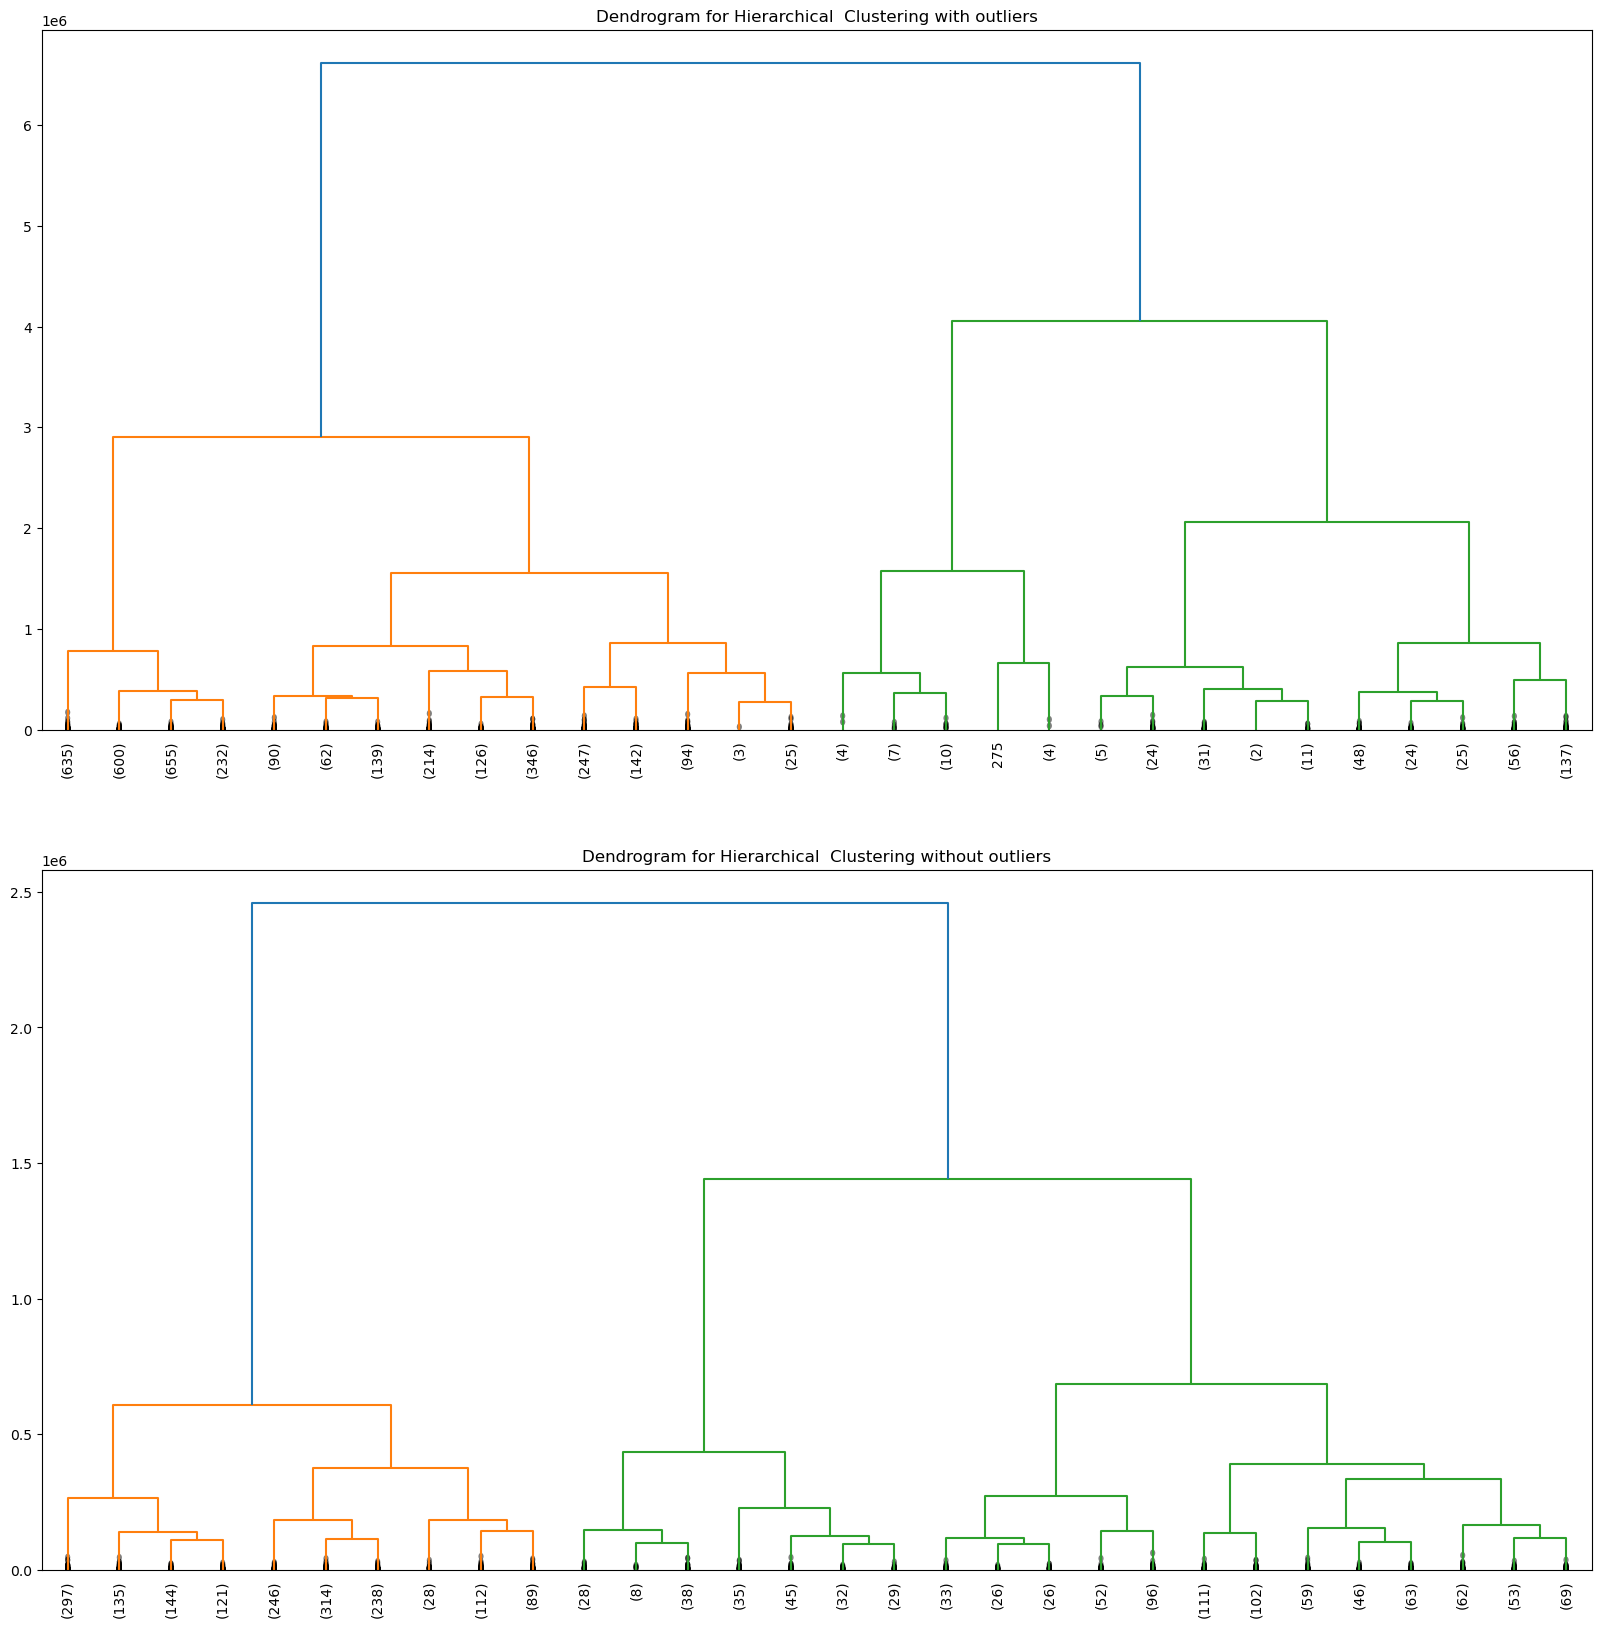

In [31]:
Z = linkage(df , method = 'ward' )
Z1 = linkage(df1 , method = 'ward' )

plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
dendrogram(Z , truncate_mode='lastp' , p=30 , leaf_rotation = 90 , leaf_font_size=10 ,show_contracted  = True)
plt.title('Dendrogram for Hierarchical  Clustering with outliers')

plt.subplot(2,1,2)
dendrogram(Z1, truncate_mode='lastp' , p=30 , leaf_rotation = 90 , leaf_font_size=10 ,show_contracted  = True)
plt.title('Dendrogram for Hierarchical  Clustering without outliers')

plt.show()

#### DBSCAN (Density-Based Spatial Clustering of Applications with Noise) :

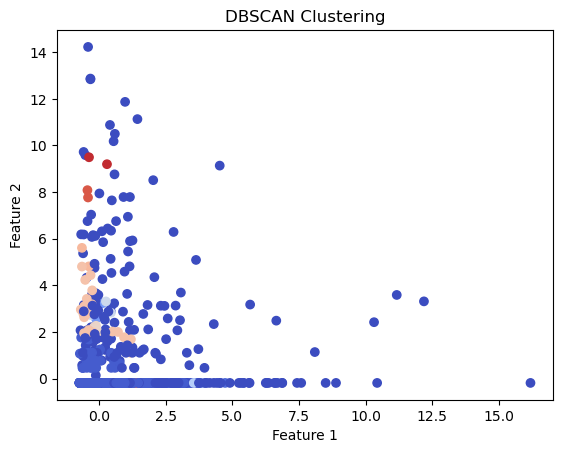

In [104]:
dbscan = DBSCAN( eps=1.0 , min_samples = 2)
dbscan.fit(x_scaler)

x_scaler = pd.DataFrame(x_scaler)

labels = dbscan.labels_

x_scaler['DBSCAN_Cluster'] = labels

plt.scatter(x_scaler.iloc[:,0] , x_scaler.iloc[:,1] , c=labels , cmap='coolwarm' )
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [126]:
x_scaler.columns     = x_scaler.columns.astype(str)
dbscan_labels        =dbscan.fit_predict(x_scaler)

non_noise_indices    = dbscan_labels !=-1
filtered_data        = x_scaler[non_noise_indices]
filtered_labels      = dbscan_labels[non_noise_indices]

dbscan_silhouette    = silhouette_score(filtered_data, filtered_labels)

print(f'DBSCAN silhouette Score : {dbscan_silhouette}')

DBSCAN silhouette Score : 0.39008547226318147


- This means the clusters created by DBSCAN are somewhat well-separated ,Some points are close to the edges of clusters, indicating there's a bit of overlap, but overall, it's decent

##### Summary:
- Both clustering methods show that their clusters are reasonably good, but DBSCAN has a better score, indicating it creates clearer groups than K-Means in this case.

### UNDERSTANDING FROM THE PLOTS :

- Removing outliers makes the groups clearer and easier to understand
- Each method helps us organize the data into groups that share common features
- In the Elbow graph, the best number of clusters is where the curve bends
- The Elbow method helps figure out how many groups (clusters) we should divide the data into
- The dendrogram shows how data points can be grouped step-by-step, where each "branch" shows groups merging together
- The DBSCAN plot shows the data spread out, with many points in the lower part, meaning more data fits in certain areas